<a href="https://colab.research.google.com/github/PDJ-09/animated-bassoon/blob/main/Simple_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [70]:
# Entries and results
c = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
f = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [71]:
# Define the model
#layer = tf.keras.layers.Dense(units=1, input_shape=[1])
#model = tf.keras.Sequential([layer])

In [72]:
# Alternative path
hid1 = tf.keras.layers.Dense(units=3, input_shape=[1])
hid2 = tf.keras.layers.Dense(units=3)
output = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([hid1, hid2, output])

In [73]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.05),
    loss='mean_squared_error'
)

In [74]:
print("Begin training...")
hist= model.fit(c, f, epochs=1000, verbose=False)
print('Training complete!')

Begin training...
Training complete!


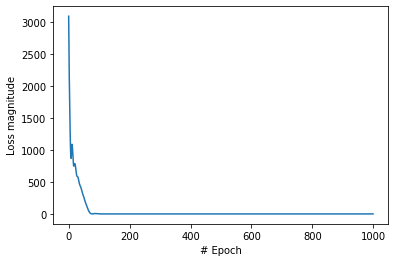

In [79]:
plt.xlabel('# Epoch')
plt.ylabel("Loss magnitude")
plt.plot(hist.history["loss"])

The plot suggests that only 400-600 epochs are needed. The model accuracy does not improve much after that. If we add more neurons to the network, less ephoch will produce results with fewer trials

In [80]:
# Predict the value of 100C in Farenheit
# 100C = 212F

res = model.predict([100])
print("The result is " + str(res) + " Farenheit")

The result is [[211.74744]] Farenheit


In [81]:
# Make a series of predictions and compare the results with real data
test_c = [-50, 44, 21, 210, -74, 0, 33]
real_f = np.array([-58, 111.2, 69.8, 410, -101.2, 32, 91.4])
predicted_f = []
diff_f = []

# Do predictions 
for c in test_c:
  result =  model.predict([c])
  predicted_f = (np.append(predicted_f, result))

# Print predictions
print("Predicted data:")
print(predicted_f)
print("\n")

# Compare predicted data
for (f_r, f_p) in zip(real_f, predicted_f):
  diff = f_r-f_p
  diff_f = np.append(diff_f, diff)

print("Model data vs real data:")
print(diff_f)

Predicted data:
[ -57.94493484  111.06229401   69.7094574   409.5218811  -101.09571838
   31.95252419   91.28485107]


Model data vs real data:
[-0.05506516  0.13770599  0.0905426   0.4781189  -0.10428162  0.04747581
  0.11514893]


In [82]:
# Check model details
print("Interal variables of the model")
#print(layer.get_weights())
print(hid1.get_weights())
print(hid2.get_weights())
print(output.get_weights())

Interal variables of the model
[array([[ 0.04062837, -0.5854247 ,  0.32470423]], dtype=float32), array([ 3.2716606 , -3.4280674 ,  0.09617397], dtype=float32)]
[array([[ 0.2586479 , -0.8872727 , -1.2276785 ],
       [ 1.463614  , -0.24726395,  0.7708408 ],
       [ 0.29224804, -0.30382222,  0.04383316]], dtype=float32), array([-3.1115875, -1.9816487, -3.2686596], dtype=float32)]
[array([[-1.1483486],
       [-0.3629802],
       [-1.9278337]], dtype=float32), array([3.0149295], dtype=float32)]
